# Assignment 9
## Due June 25th at 14:00
### names:

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from scipy.stats import expon, geom
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline

import networkx as nx

import os

#Creater a folder for images
path = os.path.dirname(os.path.abspath('Assignment9_bodden.ipynb')) + '\Images'
if not os.path.exists(path):
    os.makedirs(path)

np.random.seed(42)

## Exercise 1

In [10]:
X, y = load_breast_cancer(return_X_y=True)
shuffled_idx = np.random.permutation(len(X))
X, y = X[shuffled_idx], y[shuffled_idx]
len_test = len(X) // 3 * 2
X_train, X_test = X[:len_test], X[len_test:]
y_train, y_test = y[:len_test], y[len_test:]

### a)

In [11]:
pipe = Pipeline([('pca', PCA()),
                ('svc', SVC())])
pipe

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### b)

In [12]:
parameters = {'svc__C':[0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.01, 0.1, 1, 10, 100],
              'pca__n_components': [2, 5, 10, 20, 30]}

grid = GridSearchCV(pipe, param_grid=parameters, cv=5, iid=False)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            

In [13]:
print('Best Parameters according to crossvalidation are {} (score = {})'.format(grid.best_params_, grid.score(X_test, y_test)))


Best Parameters according to crossvalidation are {'pca__n_components': 2, 'svc__C': 10, 'svc__gamma': 0.01} (score = 0.6596858638743456)


### c)

In [14]:
param_dist = {'svc__C': expon(), 'svc__gamma': expon(), 'pca__n_components': geom(p=0.5, loc=1)}

for n in [25, 100, 1000]:
    search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter = n, cv=5, iid=False)
    search.fit(X_train, y_train)
    print('Best Parameters according to crossvalidation are {} (num iter = {}, score = {})'.format(search.best_params_, n, search.score(X_test, y_test)))


Best Parameters according to crossvalidation are {'pca__n_components': 2, 'svc__C': 1.4778921549962853, 'svc__gamma': 0.012278141143705712} (num iter = 25, score = 0.6387434554973822)
Best Parameters according to crossvalidation are {'pca__n_components': 3, 'svc__C': 1.317783019038959, 'svc__gamma': 0.0033519736348833224} (num iter = 100, score = 0.8795811518324608)
Best Parameters according to crossvalidation are {'pca__n_components': 3, 'svc__C': 0.38211993255389654, 'svc__gamma': 0.0001347020764026737} (num iter = 1000, score = 0.9109947643979057)


## Exercise 2

### a)

In [19]:
def MDS(D, d):
    num_rows = len(D)
    num_cols = len(D[0])
        
    S = (np.array([D[0, :]**2]*num_rows).T + np.array([D[0, :]**2]*num_cols) - D**2)*0.5
    #alternatively use np.tile here instad of "multiplying" with num_cols
        
    (eigvals, eigenvec) = np.linalg.eig(S)
    #Sort the eigenvalues and eigenvectors in descending order
    eigenvec = eigenvec[:, np.argsort(eigvals)[::-1]] #alternatively -eigvals
    eigvals = np.sort(eigvals)[::-1]
   
    #Choose the d largest eigenvalues and corresponding vectors
    eigvals_d = eigvals[:d]
    eigenvec_d = eigenvec[:, :d]

    #Define the diagonal matrix lambda of the eigenvalues
    lam = np.diag(eigvals_d) #!! Either give matrix and return matrix' diagonal or give vector and return diag matrix
    
    X = eigenvec_d @ np.sqrt(lam)
    
    return X

### b)

In [16]:
city_dis = pd.read_csv('eurocity.csv', sep=',')

#print(city_dis)

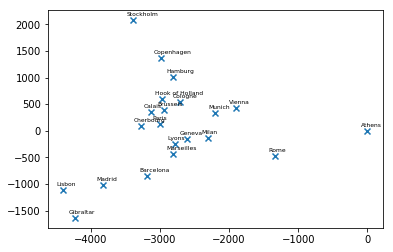

In [17]:
city_coord = MDS(city_dis.values[0:,1:].astype(float), 2)

#Flipping the coordinates around the y-axis (=changing the sign of the x-coordinates) actually gives a better orientation
city_coord[:, 0] = city_coord[:, 0]* -1

plt.scatter(city_coord[:, 0], city_coord[:, 1], marker='x')

names = city_dis.values[:,0]
for i in range(0, len(names)):
    plt.text(city_coord[i, 0]-100, city_coord[i, 1]+80, s= names[i], fontsize=6)

plt.savefig('Images/2b.png')

### c)


In [18]:
train_df = pd.read_csv('USPS.csv', sep='\t',)
X = train_df.drop(['Label'], axis=1).values
y = train_df['Label'].values
idx = np.any([y == 0, y == 3, y == 6, y == 9], axis=0)
X = X[idx]
y = y[idx]

c:\users\lenna\appdata\local\programs\python\python37\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


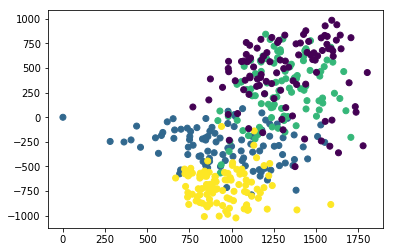

In [20]:
dist = euclidean_distances(X)
embed_2d = MDS(dist, 2)

plt.figure()
plt.scatter(embed_2d[:, 0], embed_2d[:, 1], c= y)
plt.savefig('Images/2c.png')

# Exercise 3)

### a)

In [22]:
def isomap(D, k, d):
    #First we build the kNN graph
    knn_graph = nx.Graph()
    
    for i in range(0, len(D)):
        knn_graph.add_node(i)
        
        #Find out i's closest neighbours and store their (column) indices in knn
        knn = D[i].argsort()
        
        #We add an edge from i to its k closest neighbours stored in knn, weighted by their distance stored in D
        knn_graph.add_weighted_edges_from([(i, knn[j], D[i, knn[j]]) for j in range(1, k)])
        
    #nx.draw(knn_graph)
    #Next we calculate the distance matrix according to the graph's edges
    path_lengths_list = list(nx.all_pairs_dijkstra_path_length(knn_graph))


    
    #This whole block is only necessary to unpack the mess which is returned by the nx function above
    path_lengths = np.ones_like(D)
    for p in path_lengths_list:
        (start, distances) = p
        for dest in range(0, len(distances)):
            path_lengths[start, dest] = distances[dest]
   
                
    return MDS(path_lengths, d)


In [43]:
### IGNORE WHEN CORRECTING
# Just a small playground I wanted to keep for testing this very strange method
G=nx.path_graph(5)
length= list(nx.all_pairs_dijkstra_path_length(G))
length1= nx.all_pairs_dijkstra_path_length(G)

print('length', length)
print('length[0]', length[0])

(start, path) = length[0]
print('first path distances', path)

length [(0, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}), (1, {1: 0, 0: 1, 2: 1, 3: 2, 4: 3}), (2, {2: 0, 1: 1, 3: 1, 0: 2, 4: 2}), (3, {3: 0, 2: 1, 4: 1, 1: 2, 0: 3}), (4, {4: 0, 3: 1, 2: 2, 1: 3, 0: 4})]
length[0] (0, {0: 0, 1: 1, 2: 2, 3: 3, 4: 4})
first path distances {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


### b)

Finished isomapping with k = 5
Finished isomapping with k = 20
Finished isomapping with k = 50


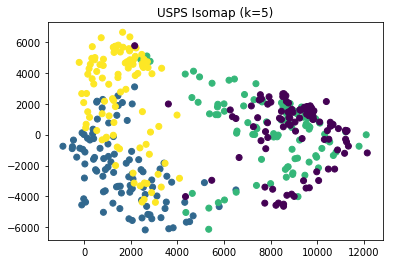

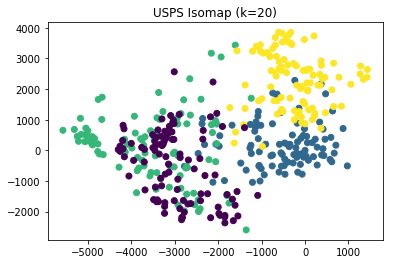

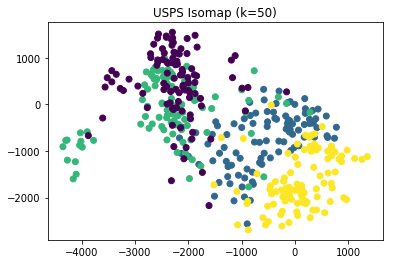

In [24]:
ks = [5, 20, 50]

for k in ks:
    iso = isomap(dist, k, 2)
    
    plt.figure()
    plt.scatter(iso[:, 0], iso[:, 1], c=y)
    plt.title('USPS Isomap (k={})'.format(k))
    plt.savefig('Images/usps_isomap_{}.png'.format(k))
    
    print('Finished isomapping with k = {}'.format(k))

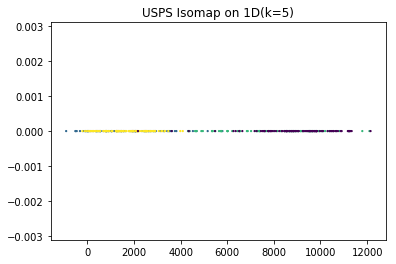

In [25]:
iso = isomap(dist, k=5, d=1)

plt.figure()
plt.scatter(iso[:, 0], np.zeros_like(iso[:, 0]), c=y, s=1.5)
plt.title('USPS Isomap on 1D(k=5)')
plt.savefig('Images/usps_isomap_5_1D.png')
    
